Epoch 1/15
750/750 [==============================] - 29s 37ms/step - loss: 0.5761 - accuracy: 0.7902 - val_loss: 0.4021 - val_accuracy: 0.8522
Epoch 2/15
750/750 [==============================] - 28s 37ms/step - loss: 0.3599 - accuracy: 0.8697 - val_loss: 0.3416 - val_accuracy: 0.8764
Epoch 3/15
750/750 [==============================] - 28s 37ms/step - loss: 0.3084 - accuracy: 0.8870 - val_loss: 0.3318 - val_accuracy: 0.8805
Epoch 4/15
750/750 [==============================] - 27s 36ms/step - loss: 0.2753 - accuracy: 0.8980 - val_loss: 0.2915 - val_accuracy: 0.8949
Epoch 5/15
750/750 [==============================] - 27s 35ms/step - loss: 0.2528 - accuracy: 0.9065 - val_loss: 0.2862 - val_accuracy: 0.8967
Epoch 6/15
750/750 [==============================] - 26s 34ms/step - loss: 0.2322 - accuracy: 0.9132 - val_loss: 0.2833 - val_accuracy: 0.8971
Epoch 7/15
750/750 [==============================] - 25s 34ms/step - loss: 0.2142 - accuracy: 0.9205 - val_loss: 0.2605 - val_accuracy:

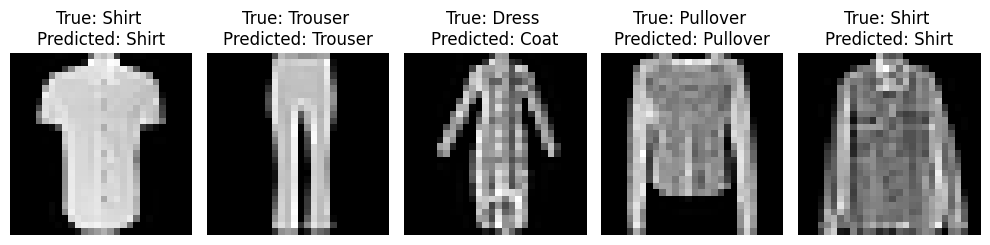

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

# Select random images from the test set
num_samples = 5
random_indices = np.random.choice(len(test_images), num_samples, replace=False)
sample_images = test_images[random_indices]
sample_labels = test_labels[random_indices]

# Make predictions on the sample images
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show images with their predicted and true labels
plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_labels[np.argmax(sample_labels[i])]} \nPredicted: {class_labels[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
# Save the model
model.save('my_cnn_model.h5')


C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('my_cnn_model.h5')
